# **Entrega 2 - Juan Daniel Gómez Rios.**
---


**Ejercicio 1.12**
---
---
**Una amiga te busca por un problema de aprendizaje. Ella dice que la funcion de destino $f$ es $completamente$ desconocida, pero ella tiene 4,000 puntos de datos. Ella está dispuesta a pagarte para que resuelvas su problema y produzcas para ella una función $g$ que aproxime $f$. ¿Qué es lo mejor que puedes prometerle entre las siguientes opciones?**
\
\
**($a$) Después del aprendizaje tú le darás una $g$ la cual garantizas que aproxima bien $f$ "out of sample".**
\
\
**($b$)  Después del aprendizaje tú le darás una $g$ y con una alta probabilidad la $g$ que obtuviste aproximará bien $f$ "out of sample".**
\
\
**($c$) Una de dos cosas sucederán:** \
**(i) Producirás una hipótesis $g$;** \
**(ii) Declararás que fallaste.** \
**Si tú entregas una hipótesis $g$, entonces, con alta probabilidad, $g$ aproximará bien $f$ "out of sample".** \
\
\
**RTA:** La cantidad de datos es bastante alta y dependiendo de la $f$ es bastante factible producir una $g$ que aproxime bien a $f$ pero también puede suceder que $f$ sea lo suficientemente compleja como para no poder producir una $g$. Por lo cual yo prometería la $c$.

**Problema 1.2**
---
---
**Considere el perceptrón en dos dimensiones: $h(x)=$sign$(w^Tx)$ donde $w=[w_0,w_1,w_2]^T$ y $x=[1,x_1,x_2]^T$. Técnicamente, $x$ tiene tres coordenadas pero llamamos esto perceptrón dos-dimensional porque la primer coordenada está fija en 1.**
\
\
**($a$) Muestre que las regiones en el plano donde $h(x)=+1$ y $h(x)=-1$ están separadas por una linea. Si expresamos esta linea por la ecuación $x_2=ax_1+b$, ¿Cuáles son la pendiente $a$ y el intercepto $b$ en términos de $w_0,w_1,w_2$?** \
**RTA:** El $h(x)=-1$ quiere decir que $w^Tx<0$. El caso en que $h(x)=1$ quiere decir que $w^Tx>0$. Esto implica que las regiones en el plano donde $h(x)=+1$ y $h(x)=-1$ están separadas por el plano definido como 
$$w^Tx=w_0(1)+w_1(x_1)+w_2(x_2)=0.$$
Si despejamos $x_2$ tenemos que
$$x_2=\cfrac{-w_1}{w_2}x_1-\cfrac{-w_0}{w_2}$$
Por lo que tenemos que la pendiente $a$ y el intercepto $b$ son:
$$a=\cfrac{-w_1}{w_2}, \ b=\cfrac{-w_0}{w_2}.$$
\
\
**($b$)  Dibuje una grafica para los casos $w=[1,2,3]^T$ y $w=-[1,2,3]^T$.**
\
\
**En más de dos dimensiones, las regiones $+1$ y $-1$ están separadas por un hiperplano, la generalización de una linea.**

**RTA:** Notemos que para ambos casos el plano de separación es el mismo ya que si $w^Tx=0$, también $-w^Tx=0$. Sólo que el semiplano superior será la región +1 para el primer caso siendo el semiplano inferior la región -1, mientras que para el segundo caso el semiplano superior será la región -1 y el semiplano inferior la región +1. Veamos el gráfico con el plano de separación dado por la fórmula
$$x_2=-\cfrac{2}{3}x_1-\cfrac{1}{3}.$$

In [ ]:
from IPython import display
iframe= '<iframe src="https://www.desmos.com/calculator/easvyk8ipj?embed" width="700" height="700" style="border: 1px solid #ccc" frameborder=0></iframe>'
display.HTML(iframe)

**Problema 1.4**
---
---
**En el ejercicio 1.4, se usó un conjunto de datos artificial para estudiar el algoritmo de aprendizaje del perceptron. Este problema te dirigirá a explorar más a profundidad el algoritmo con conjuntos de datos de diferentes tamaños y dimensiones.**\


**($a$) Genere un conjunto de datos linealmente separables de tamaño 20 como está indicado en el ejercicio 1.4. Grafique los ejemplos $\{(x_n,y_n)\}$ así como la función $f$ en un plano. Marque los ejemplos de las diferentes clases de manera diferenciable y agregue etiquetas a los ejes de la gráfica.**


**($b$) Corra el algoritmo de aprendizaje del perceptrón en el conjunto de datos anterior. Reporte el número de actualizaciones del algoritmo antes de converger. Grafique los ejemplos $\{(x_n,y_n)\}$, la función objetivo $f$ y la hipótesis final $g$ en la misma gráfica. Comente donde $f$ está más cerca a $g$.**

**($c$) Repita todo en $(b)$ con otro conjunto de datos aleatorio de tamaño 20. Compare los resultados con $(b)$.**

**($d$) Repita todo en $(b)$ con otro conjunto de datos aleatorio de tamaño 100. Compare los resultados con $(b)$.**

**($e$) Repita todo en $(b)$ con otro conjunto de datos aleatorio de tamaño 1000. Compare los resultados con $(b)$.**

**($f$) Modifique el algoritmo tal que $x_n\in R^{10}$ en vez de $R^2$. Genere de manera aleatoria un conjunto de datos linealmente separables de tamaño 1000, con $x_n\in R^10$ y alimente el algoritmo conjunto de datos. ¿Cuántas actualizaciones hace el algoritmo para converger?**

**($g$) Repita el algoritmo en el mismo conjunto de datos en $(f)$ para 100 experimentos. En la iteración de cada experimento escoja una función $x(t)$ de manera aleatoria en vez de manera determinista. Grafique un histograma para el número de actualizaciones para que el algoritmo converja.**

**($h$) Concluya respecto a la presición y tiempo de ejecución como una función de $N$ y $d$.**

In [27]:
#imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

In [46]:
#functions
def perceptron(points, dim, max_it=100, use_adaline=False, 
               eta = 1, randomize=False, print_out = True):
    print_out=True
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if use_adaline else 0
            st = st if use_adaline else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break
    
    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
    w = w/w[-1]
    if print_out:
        print('final correctness: ', c, '. Total iteration: ', it)
        print('final normalized w:', w)
    return w, it


def generate_random_numbers(N, dim, num_grid_points, lb, ub):
    random_ints = np.random.randint(num_grid_points, size=(N, dim))
    zero_to_one_points =  (random_ints)/(num_grid_points - 1)
    res = lb + (ub - lb)*zero_to_one_points
    return res

def generate_random_coeffs(dim):
    rn = generate_random_numbers(1, dim, 1000, -10, 10)
    return rn

def true_f(x, coeffs):
    return coeffs.flatten()[0] + np.dot(coeffs.flatten()[1:], x.flatten())

def generate_two_classes(N, dim, true_func, rn_func):
    cls1, cls2 = [], []
    while True:
        rn = rn_func(1, dim).flatten()
        if true_func(rn) > 0 and len(cls1) < N:
            cls1.append(rn)
        elif true_func(rn) < 0 and len(cls2) < N:
            cls2.append(rn)
        if len(cls1) == N and len(cls2) == N:
            break
    return np.asarray(cls1), np.asarray(cls2)    

def generate_df(N, dim,true_func, rn_func):
    cls1, cls2 = generate_two_classes(N/2, dim, true_func, rn_func)
    cols = ['x' + str(i) for i in range(1, dim+1)]
    df1 = pd.DataFrame(cls1, columns=cols)
    df1['y'] = 1
    df2 = pd.DataFrame(cls2, columns=cols)
    df2['y'] = -1
    df = pd.concat([df1, df2])
    df['x0'] = 1
    df = df[['x0'] + cols + ['y']]
    return df

def plot_data(x1, df, norm_coeffs, norm_g, lb, ub):
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1), label='True Function')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='+', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')
        if norm_g is not None:
            hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'r', label='Final Hypothesis')

        ax.set_ylabel(r"$x_2$", fontsize=11)
        ax.set_xlabel(r"$x_1$", fontsize=11)
        ax.set_title('Data set size = %s'%N, fontsize=9)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['True Function', 'Final Hypothesis', 
                   '+1 labels', '-1 labels', ], 
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        #ax.legend(handles=[pluses, minuses], fontsize=9)
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()
        
def run_perceptron_experiment(N, dim, lb, ub, num_grid_points, coeff_lb, coeff_ub, 
                              eta, maxit, use_adaline=False, randomize=False,
                              show_plot=True, test_N = 10000):
    
    rns = generate_random_numbers(N, dim, num_grid_points, lb, ub)
    rn_func = partial(generate_random_numbers, num_grid_points = num_grid_points, lb = lb, ub = ub)
    coeffs = generate_random_numbers(1, dim+1, num_grid_points, coeff_lb, coeff_ub)
    norm_coeffs = coeffs.flatten()/coeffs.flatten()[-1]
    true_func = partial(true_f, coeffs = norm_coeffs)
    df = generate_df(N, dim, true_func, rn_func)
    test_df = generate_df(test_N, dim, true_func, rn_func)
    
    x1 = np.arange(lb, ub, 0.01)
    norm_g, num_its = perceptron(df.values, dim, maxit, use_adaline, 
                                 eta, randomize, show_plot)
    
    if show_plot:
        print('True coeffs: ', norm_coeffs)
        plot_data(x1, df, norm_coeffs, norm_g, lb, ub)
    return num_its, norm_g, test_df

final correctness:  20 . Total iteration:  9
final normalized w: [0.0585454  1.02928734 1.        ]
True coeffs:  [12.40350877  0.92982456  1.        ]


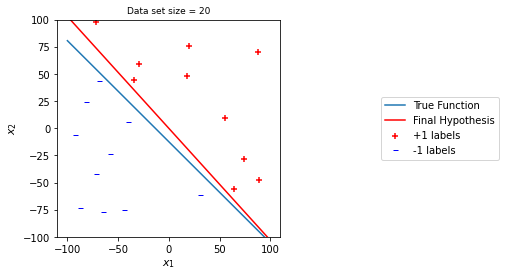

In [47]:
#### problem 1.4 (a)-(c)
lb, ub = -100, 100 #rango de los valores del conjunto de datos
N, dim = 20, 2 #número de datos y dimensión
num_grid_points = 2000 #número máximo de datos en la gráfica
coeff_lb, coeff_ub = -10, 10
eta = 1
maxit = 100
use_adaline, randomize =False, False
_, _, _ = run_perceptron_experiment(N, dim, lb, ub, num_grid_points,
                             coeff_lb, coeff_ub, eta, maxit, use_adaline, randomize)

final correctness:  1000 . Total iteration:  320
final normalized w: [0.92814858 1.17382472 1.        ]
True coeffs:  [1.00727273 1.16242424 1.        ]


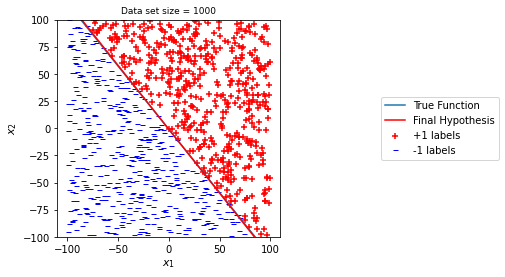

In [48]:
#### problem 1.4 (d)(e)
lb, ub = -100, 100
N, dim = 1000, 2
num_grid_points = 2000
coeff_lb, coeff_ub = -10, 10
eta = 1
maxit = 2000
use_adaline, randomize =False, False
_, _, _ = run_perceptron_experiment(N, dim, lb, ub, num_grid_points,
                             coeff_lb, coeff_ub, eta, maxit, use_adaline, randomize)

In [49]:
#### problem 1.4 (f)
lb, ub = -100, 100
N, dim = 1000, 10 
num_grid_points = 2000
coeff_lb, coeff_ub = -10, 10
eta = 1
maxit = 50000
use_adaline, randomize =False, False
_, _, _ = run_perceptron_experiment(N, dim, lb, ub, num_grid_points,
                                 coeff_lb, coeff_ub, eta, maxit, use_adaline, randomize, show_plot=False)

final correctness:  1000 . Total iteration:  6360
final normalized w: [ 0.83357065  0.70936743 -0.68174991 -0.02739562  0.1342983   0.44746185
  0.65469566 -0.45613286 -0.81898406 -0.36918376  1.        ]


(array([25., 34., 21., 11.,  4.,  3.,  0.,  1.,  0.,  1.]),
 array([  612. ,  3085.2,  5558.4,  8031.6, 10504.8, 12978. , 15451.2,
        17924.4, 20397.6, 22870.8, 25344. ]),
 <a list of 10 Patch objects>)

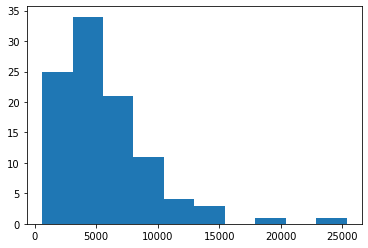

In [34]:
#### problem 1.4 (g)
lb, ub = -100, 100
N, dim = 1000, 10 
num_grid_points = 2000
coeff_lb, coeff_ub = -10, 10
eta = 1
maxit = 50000
use_adaline, randomize =False, True
show_plot = False
num_iterations = []
for it in range(100):
    #print('Working on experiment: ', it)
    num_it, _, _ = run_perceptron_experiment(N, dim, lb, ub, num_grid_points,
                                     coeff_lb, coeff_ub, eta, maxit, use_adaline, randomize,
                                      show_plot)
    num_iterations.append(num_it)
    
plt.hist(num_iterations)

**Problema 1.6**
---
---
**Considere una muestra de 10 canicas extraídas independientemente de una papelera que contiene canicas rojas y verdes. La probabilidad de una canica roja es $\mu$. Para $\mu=0.05, \mu=0.5$ y $\mu=0.8$ compute la probabilidad de no obtener canicas rojas $(v=0)$ en los siguientes casos.**\
\
\
**($a$) Extraemos únicamente una sola muestra (de 10 canicas). Compute la probabilidad de que $v=0$.**\
**RTA: Para cada canica extraída la probabilidad de que no sea roja es $1-\mu$, por lo que la probabilidad de no obtener una canica roja al extraer 10 canicas esta dada por la siguiente expresión.**
$$P(v=0)=(1-\mu)^10.$$
Calculemos las probabilidades variando $\mu$. 

In [ ]:
def proba(mu):
  return print('para mu = '+ str(mu)+ ' : ',(1-mu)**10)

#para \mu = 0.05
proba(0.05)

#para \mu = 0.5
proba(0.5)

#para \mu = 0.8
proba(0.8)

para mu = 0.05 :  0.5987369392383787
para mu = 0.5 :  0.0009765625
para mu = 0.8 :  1.0239999999999978e-07


**($b$) Extraemos independientemente 1000 muestras. Compute la probabilidad de que (por lo menos) una de las muestras tenga $v=0$.**\
**RTA:** La probabilidad $P$ será igual a 1 menos la probabilidad de que todas las muestras tengan $v>0$ que a su vez se puede calcular como 1 menos la probabilidad de que cada muestra tenga $v=0$. Teniendo en cuenta que son 1000 muestras, podemos expresar $P$ como
$$P=1-(1-(1-\mu)^{10})^{1000}.$$
Calculemos esta probabilidad para los distintos valores de $\mu$.

In [ ]:
def proba2(mu, num_of_samples):
  return print('para mu = '+ str(mu)+ ' : ', 1-(1-(1-mu)**10)**num_of_samples)

#para \mu = 0.05
proba2(0.05,1000)

#para \mu = 0.5
proba2(0.5,1000)

#para \mu = 0.8
proba2(0.8,1000)

para mu = 0.05 :  1.0
para mu = 0.5 :  0.623576201943276
para mu = 0.8 :  0.00010239476257623004


**($c$) Repita $(b)$ para 1000000 muestras independientes.**

In [ ]:
#para \mu = 0.05
proba2(0.05,1000000)

#para \mu = 0.5
proba2(0.5,1000000)

#para \mu = 0.8
proba2(0.8,1000000)

para mu = 0.05 :  1.0
para mu = 0.5 :  1.0
para mu = 0.8 :  0.09733159268316072


**Problema 1.12**
---
---
**Este problema investiga como cambiar la medida de error puede cambiar el resultado del proceso de aprendizaje. Usted tiene $N$ puntos de datos $y_1\leq y_2...\leq y_N$ y desea estimar un valor representativo.**\
\
\
**($a$) Si su algoritmo halla la hipótesis $h$ que minimiza la suma $in-sample$ de las desviaciones cuadradas,**
$$E_{in}(h)=\sum_{n=1}^N(h-y_n)^2,$$
**entonces muestre que su estimado estará en la media del $in-sample$,**
$$h_{mean}=\cfrac{1}{N}\sum_{n=1}^Ny_n.$$

**RTA:** Para encontrar la hipótesis $h$ mínima, derivamos la función $E_{in}$ para encontrar el valor mínimo de la función igualando a 0.

$$\cfrac{dE_{in}(h)}{dh}=2\sum_{n=1}^N(h-y_n)=0$$
$$\sum_{n=1}^N(h-y_n)=0$$
$$\sum_{n=1}^N(h)=\sum_{n=1}^N(y_n)$$
$$h\cdot N=\sum_{n=1}^N(y_n)$$
$$h=\cfrac{1}{N}\sum_{n=1}^N(y_n)=h_{mean}$$

Notemos que en efecto $h$ es un mínimo.
$$\cfrac{d^2E_{in}(h)}{d^2h}=2N>0.$$
Es decir, el estimado $h$ está en la media.\
\
\
**($b$) Si su algoritmo encuentra una hipótesis $h$ que minimiza la suma de las desviaciones absolutas,**
$$E_{in}(h)=\sum_{n=1}^N|h-y_n|,$$
**muestre que su estimado estará en la media $h_{med}$, que es cualquier valor por el cual la mitad de los datos es a lo mucho $h_{med}$ y la otra mitad de los datos es por lo menos $h_{med}$.**\
**RTA:** Igual que en el punto anterior, derivamos la función $E_{in}(h)$ e igualamos a 0.
$$\cfrac{dE_{in}(h)}{dh}=\sum_{n=1}^N sgn(h-y_n)=0.$$
Claramente la derivada será igual a 0 si hay tantos valores positivos como los hay de negativos, es decir, hay tantos valores $y_n$ por encima de $h$ como por debajo de $h$ por lo que $h=h_{med}$.
\
\
**($c$) Suponga que $y_N$ es perturbado a $y_N+\epsilon$ donde $\epsilon \to \infty$. Así, el dato $y_N$ se convierte en un punto aislado. ¿Qué pasa con sus dos estimaciones $h_{mean}$ y $h_{med}$?**\
**RTA:** Notemos que si $y_N\to\infty$,
$$h_{mean}=\cfrac{1}{N}\sum_{n=1}^N(y_n)\to \infty$$
pero como $y_N\geq y_n$ para todo $n$, es claro que $y_N\geq h_{med}$ por lo que $h_{med}$ se mantiene igual.
